## Feature extraction procedure


INPUT:
* matrix $A$ of **normalized** edge weights, where the $i$-th row, $A[i, :]$, holds weights of edges COMING OUT of $i$, and the $i$-th column, $A[:, i]$, holds weights of edges COMING INTO $i$;
* $k$ - number of most important edges used to build the feature vector;


OUTPUT:
* matrix $X$ in which the $i$-th row holds features characterizing the $i$-th node.

Let's use the following matrix $A$ as our example:

In [1]:
import numpy as np


adj_mat = np.array([
    [1, 2, 1, 3, 4],
    [2, 1, 2, 0, 2],
    [3, 0, 2, 1, 1],
    [1, 0, 0, 0, 5],
    [0, 2, 3, 2, 4],
])

And let's focus on node $i = 0$.

In [2]:
i = 0

We'll store the triples in the following list of lists:

In [3]:
graph_size = len(adj_mat) 
triples =  graph_size * [[]]

We'll eventually run the following in a loop:

```python
for i in range(len(adj_mat)):
```

but, like I said, we'll focus on node $i = 0$.

In [4]:
triples[i] += [(-adj_mat[i,j], i, j) for j in range(graph_size)]
triples[i] += [( adj_mat[j,i], j, i) for j in range(graph_size)]

Now, we'll leave $k$ most relevant edge weights.

Let's use:

In [5]:
k = 5

In [6]:
triples[i] = sorted(triples[i], key=lambda trip: -abs(trip[0]))

triples[i] = triples[i][:k]

**TODO:** if there are any conflicts (weights with the same absolute values) I'm just choosing them randomly. This might be (probably) done better.

We can now start building the feature vector for node $i$.

We initialize it with the $k$ most importand edge weights coming out/into node $i$:

In [7]:
feat_vec = [w for (w, id_1, id_2) in triples[i]]

Next, we add the surroundings of the most relevant neighbors.

To do that, we'll need triples of all the nodes:

In [8]:
from utils import produce_triples


triples = produce_triples(adj_mat, k)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


OK, so we'll go through `triples[i]` and append to the `feat_vec` weights corresponding to the neighbors of node $i$:

In [9]:
for (w, id_1, id_2) in triples[i]:
    sign = w / abs(w)
    this_id, neighbor_id = (id_2, id_1) if sign == 1 else (id_1, id_2)
    assert this_id == i
    
    feat_vec += [sign * v for (v, _, _) in triples[neighbor_id]]
    
assert len(feat_vec) == k * (k + 1)

## Finally...

The above procedure is implemented in the `utils.extract_features` function.

In [10]:
from utils import extract_features


X = extract_features(adj_mat, k)

In [11]:
X

array([[-4, -3,  3, -2,  2, -5,  4, -4, -4,  3,  5, -3, -2,  1, -1, -3,
         3, -2,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2,  2,  2],
       [-2, -2, -2,  2,  2,  4,  3, -3,  2, -2,  3, -3,  2, -2, -2, -5,
         4, -4, -4,  3, -4, -3,  3, -2,  2,  5, -4,  4,  4, -3],
       [-3,  3, -2,  2,  2,  4,  3, -3,  2, -2,  5, -4,  4,  4, -3,  3,
        -3,  2, -2, -2, -2, -2, -2,  2,  2, -3,  3, -2,  2,  2],
       [-5,  3,  2, -1,  1, -5,  4, -4, -4,  3, -4, -3,  3, -2,  2,  5,
        -4,  4,  4, -3,  4,  3, -3,  2, -2, -3,  3, -2,  2,  2],
       [ 5, -4,  4,  4, -3, -5,  3,  2, -1,  1, -5,  4, -4, -4,  3, -4,
        -3,  3, -2,  2,  5, -4,  4,  4, -3,  3, -3,  2, -2, -2]])

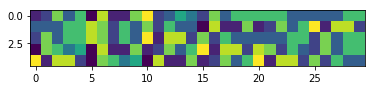

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(X);